# Importing Libraries

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Nadam
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np 
import pandas as pd 

# Loading the Dataset

In [90]:
df = pd.read_csv('C:/Users/ankur/Desktop/gld_price_data.csv')

In [91]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [92]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [93]:
df.shape

(2290, 6)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


# Data preprocessing

In [95]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [96]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2285    False
2286    False
2287    False
2288    False
2289    False
Length: 2290, dtype: bool

In [97]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation Between Columns

In [98]:
correlation = df.iloc[:,1:].corr()

<Axes: >

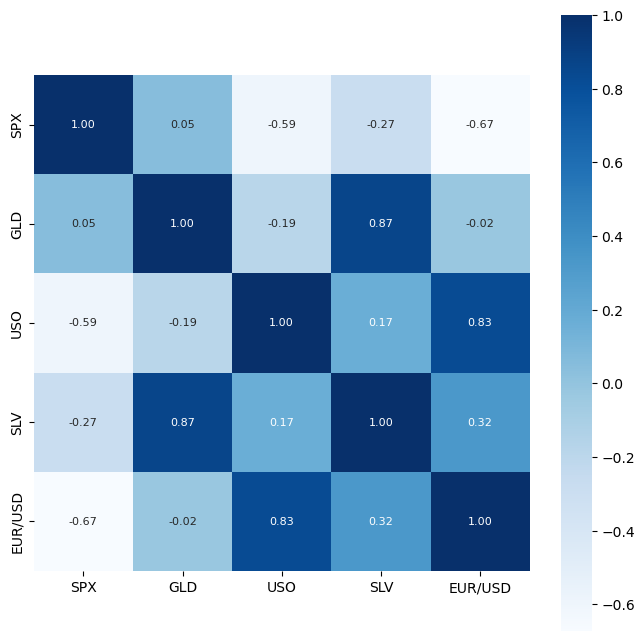

In [99]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8 },cmap='Blues')

In [100]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\ankur\AppData\Local\Temp\ipykernel_10856\3030281137.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

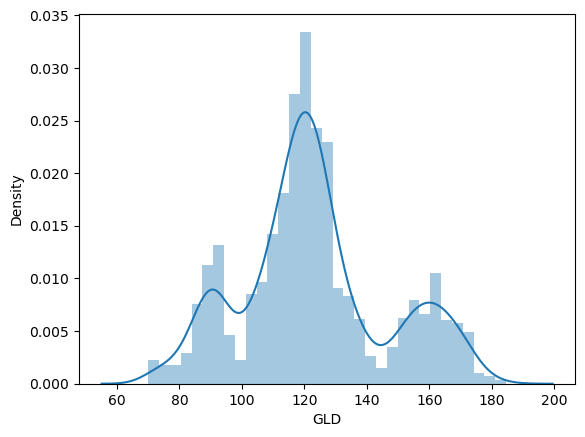

In [101]:
sns.distplot(df['GLD'])

# Modeling the Data

In [102]:
x = df.drop(['Date','GLD'],axis=1)
y = df['GLD']

In [103]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [104]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [105]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.2,random_state=42)

# Train Models

# Random Forest Regressor

In [106]:
regressor = RandomForestRegressor()

In [107]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

# Linear Regression

In [108]:
lreg = LinearRegression()

In [109]:
lreg.fit(x_train, y_train)

LinearRegression()

# Artificial Neural Network

In [110]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

optimizer = Nadam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [111]:
history = model.fit(x_train, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 4643.3765 - val_loss: 1376.9414
Epoch 2/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1311.0674 - val_loss: 1062.4037
Epoch 3/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 959.0181 - val_loss: 744.9634
Epoch 4/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 707.6810 - val_loss: 684.4473
Epoch 5/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 578.8631 - val_loss: 391.0358
Epoch 6/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 421.3472 - val_loss: 357.1935
Epoch 7/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 359.6146 - val_loss: 257.0973
Epoch 8/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 306.9998 - val_loss: 207.8139
Epoch 9/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 234.6081 - val_loss: 191.8591
Epoch 10/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 201.0014 - val_loss: 120.9849
Epoch 11/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 145.5431 - val_loss: 132.3250
Epoch 12/200
4

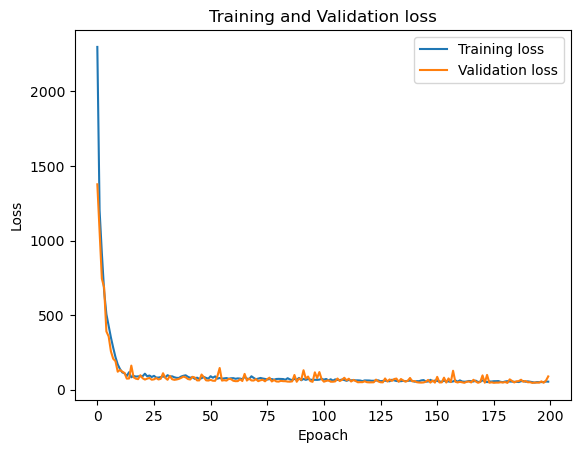

In [112]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoach')
plt.ylabel('Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# Model evaluations

# Random Forest Regressor

In [113]:
test_pred = regressor.predict(x_test)

In [114]:
test_pred

array([122.46979911, 130.58180267, 127.48039978,  96.62509739,
       118.88500075, 114.36769926, 124.76000133, 117.75929946,
       108.0323012 ,  98.31339963,  95.29039892, 167.81819799,
       149.24910111, 116.23360037, 170.86260156,  84.98399962,
       122.99189884, 108.67699688, 113.2157009 , 131.79760293,
       124.23019925, 113.77820109, 115.9763008 , 108.58309942,
       108.56510103, 125.73259953, 119.93899942, 112.52319921,
       113.45480129, 125.52139883, 146.00620151,  89.61860018,
       167.71049987, 113.76059974, 108.38030103, 120.21980129,
       141.51399856, 161.41200057, 174.27579801, 153.14850108,
       119.60970094, 113.75630041, 121.33229965, 113.66249935,
       121.97790026, 108.16510102,  88.62499854, 114.57189922,
       129.72080236, 118.16380091, 103.62910086, 129.79160265,
       107.11939869, 160.48640219, 131.51120001, 118.29569971,
       147.31290035, 133.76550224,  95.61270099, 124.69380155,
       114.95319866,  86.23540032, 104.18159926, 113.89

In [115]:
rf_r2 = r2_score(y_test,test_pred)
rf_mse = mean_squared_error(y_test, test_pred)
rf_mae = mean_absolute_error(y_test, test_pred)

In [116]:
print("Random Forest Regression:")
print("MSE:", rf_mse)
print("MAE:", rf_mae)
print("R-squared:", rf_r2)

Random Forest Regression:
MSE: 5.5061634161074755
MAE: 1.232843478624457
R-squared: 0.9899577522089037


# Linear Regression

In [117]:
lreg_pred = lreg.predict(x_test)

In [118]:
lreg_pred

array([122.51325689, 127.0907545 , 125.50313349, 104.54764991,
       124.90068634, 116.586858  , 123.04583828, 125.14446632,
       112.05259024, 104.88193814, 101.00127079, 157.04211875,
       137.50447931, 110.49031012, 160.83929478,  88.48009266,
       117.77776928, 118.96072884, 121.53807068, 128.1487556 ,
       118.02290942, 116.08975575, 109.6315024 , 103.05777279,
       111.84096218, 120.86033322, 119.62399827, 112.20020453,
       109.19479998, 119.62171119, 196.11502374,  99.10085802,
       157.19764615, 122.07046494, 113.39777112, 123.34726222,
       132.36268845, 152.08038513, 176.64473496, 145.03588282,
       124.05185863, 121.33549213, 122.74098458, 115.57613444,
       122.35927588, 112.09083408,  93.45476082, 116.93571065,
       126.42056988, 118.08975012, 105.4726357 , 126.56933728,
       105.64602965, 151.78330086, 137.80329213, 117.39236458,
       159.54433502, 126.41884417, 100.17367568, 122.74815137,
       109.79583313,  86.2818531 , 113.37269965, 120.30

In [119]:
lreg_r2 = r2_score(y_test,lreg_pred)
lreg_mse = mean_squared_error(y_test, lreg_pred)
lreg_mae = mean_absolute_error(y_test, lreg_pred)

In [120]:
print("Linear Regression:")
print("MSE:", lreg_mse)
print("MAE:", lreg_mae)
print("R-squared:", lreg_r2)

Linear Regression:
MSE: 56.165594215005996
MAE: 5.695900644269285
R-squared: 0.8975640982991402


# Artificial Neural Network

In [121]:
ann_pred = model.predict(x_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [122]:
ann_pred

array([[135.15726 ],
       [140.41966 ],
       [138.69774 ],
       [ 91.30562 ],
       [132.0619  ],
       [121.73398 ],
       [138.7306  ],
       [131.82523 ],
       [113.04426 ],
       [111.769775],
       [ 94.04294 ],
       [176.41156 ],
       [142.32701 ],
       [115.68053 ],
       [177.0038  ],
       [ 87.83236 ],
       [131.18436 ],
       [123.48713 ],
       [126.97247 ],
       [134.72604 ],
       [130.39005 ],
       [120.78472 ],
       [115.016785],
       [110.5383  ],
       [112.16366 ],
       [136.3255  ],
       [133.52724 ],
       [117.94527 ],
       [114.373566],
       [130.99872 ],
       [176.39745 ],
       [ 98.61029 ],
       [159.27106 ],
       [127.485016],
       [112.65672 ],
       [131.58775 ],
       [145.22264 ],
       [174.38602 ],
       [163.90233 ],
       [162.18764 ],
       [130.10675 ],
       [126.40999 ],
       [134.69415 ],
       [121.14759 ],
       [133.83096 ],
       [113.76491 ],
       [ 88.259186],
       [121.3

In [123]:
model.evaluate(x_test, y_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 85.9715


78.76614379882812

In [124]:
ann_r2 = r2_score(y_test,ann_pred)
ann_mse = mean_squared_error(y_test, ann_pred)
ann_mae = mean_absolute_error(y_test, ann_pred)

In [125]:
print("Artificial Neural Network:")
print("MSE:", ann_mse)
print("MAE:", ann_mae)
print("R-squared:", ann_r2)

Artificial Neural Network:
MSE: 80.54843564445785
MAE: 7.590889651399171
R-squared: 0.8530941984830057


# Conclusion

In [126]:
y_test = list(y_test)

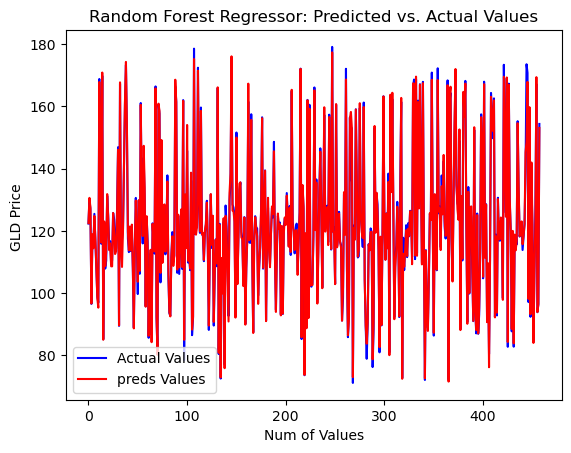

In [127]:
plt.plot(y_test , color = 'blue',label ='Actual Values')
plt.plot(test_pred , color = 'red',label ='preds Values')
plt.xlabel('Num of Values')
plt.ylabel('GLD Price ')
plt.title('Random Forest Regressor: Predicted vs. Actual Values')
plt.legend()
plt.show()

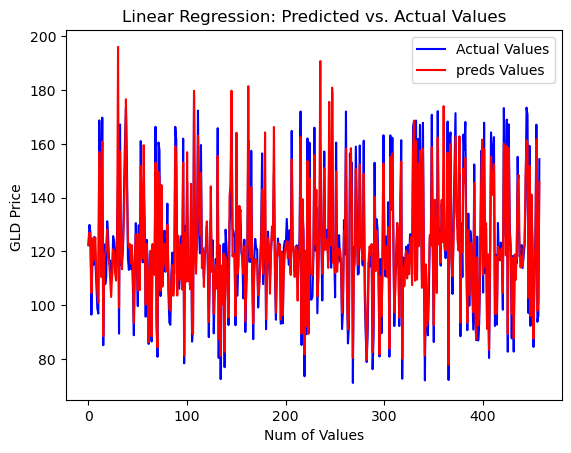

In [128]:
plt.plot(y_test , color = 'blue',label ='Actual Values')
plt.plot(lreg_pred , color = 'red',label ='preds Values')
plt.xlabel('Num of Values')
plt.ylabel('GLD Price ')
plt.title('Linear Regression: Predicted vs. Actual Values')
plt.legend()
plt.show()

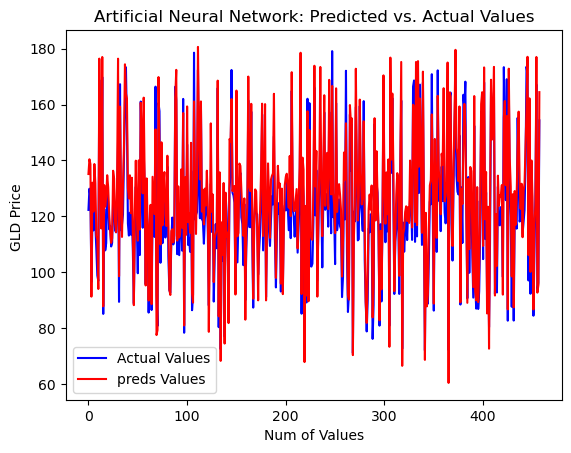

In [129]:
plt.plot(y_test , color = 'blue',label ='Actual Values')
plt.plot(ann_pred , color = 'red',label ='preds Values')
plt.xlabel('Num of Values')
plt.ylabel('GLD Price ')
plt.title('Artificial Neural Network: Predicted vs. Actual Values')
plt.legend()
plt.show()

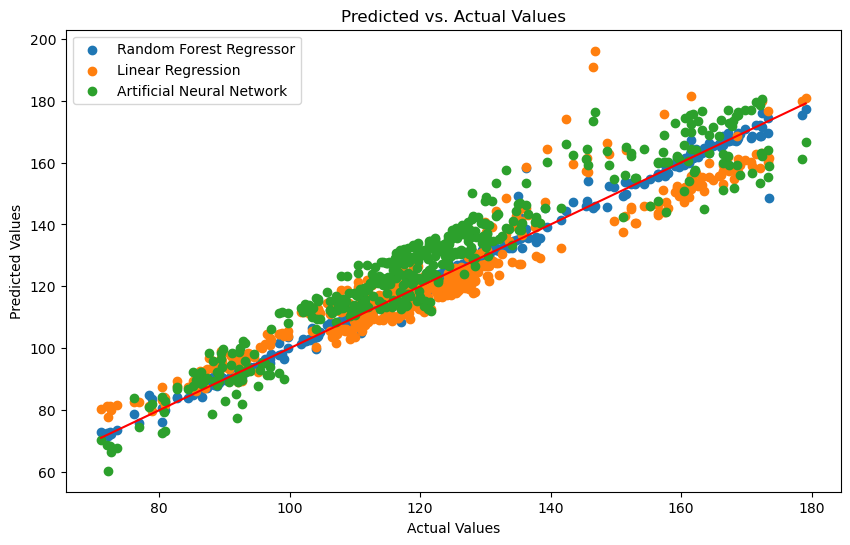

In [130]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred, label='Random Forest Regressor')
plt.scatter(y_test, lreg_pred, label='Linear Regression')
plt.scatter(y_test, ann_pred, label='Artificial Neural Network')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

In [139]:
df1 = pd.read_csv('C:/Users/ankur/Desktop/book1.csv')

In [141]:
df1

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1450.160034,87.860001,80.470001,17.18,1.471692


In [143]:
X = df1.drop(['Date','GLD'],axis=1)
Y = df1['GLD']

In [144]:
pred = regressor.predict(X)
pred

array([89.1331991])